In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
import cv2

In [63]:
img = cv2.imread('./twst_images/Maria Sharapova.jpg')

In [64]:
img.shape

(555, 700, 3)

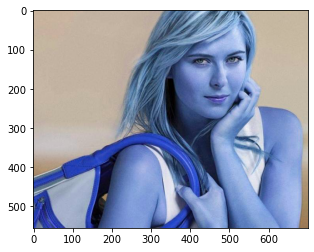

In [65]:
plt.imshow(img)

In [66]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

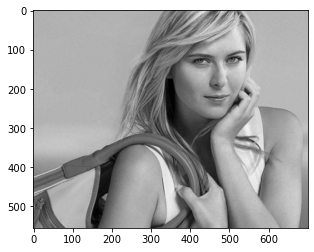

In [67]:
plt.imshow(gray,cmap='gray')

In [68]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')



In [69]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
# returns x,y,width and height of face

array([[352,  38, 233, 233]], dtype=int32)

In [70]:
(x,y,w,h)=faces[0]

In [71]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

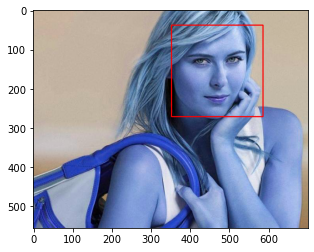

In [72]:
plt.imshow(face_img)

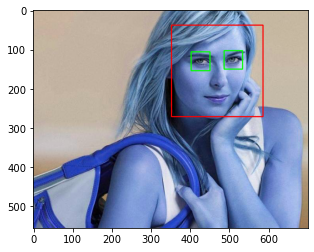

In [73]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()


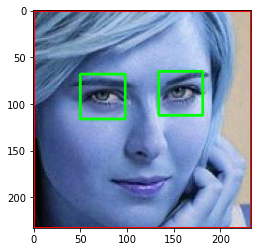

In [130]:
plt.imshow(roi_color,cmap='gray')

In [45]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

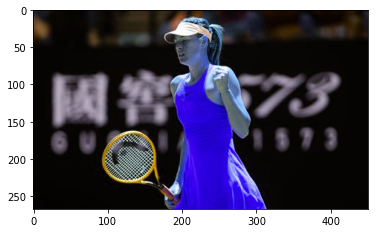

In [46]:
org_image_obstructed = cv2.imread('./twst_images/sharapova1.jpg')
plt.imshow(org_image_obstructed)

In [47]:
cropped_image_no_2_eyes=get_cropped_image_if_2_eyes('./twst_images/sharapova1.jpg')

In [48]:
#Returns nothing as face clear
cropped_image_no_2_eyes

In [49]:
path_to_data="./dataset/"
path_to_cr_data='./dataset/cropped/'

In [50]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)


In [51]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [52]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)    

In [53]:
   cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [81]:
cropped_img = np.array(roi_color)
cropped_img.shape

(233, 233, 3)

In [82]:
import pywt
import cv2
def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

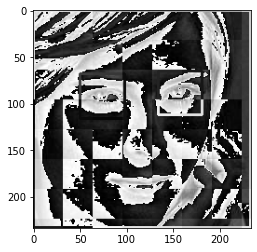

In [84]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [91]:
celebrity_file_names_dict.items()

dict_items([('cropped', []), ('lionel_messi', ['./dataset/cropped/lionel_messi/lionel_messi1.png', './dataset/cropped/lionel_messi/lionel_messi2.png', './dataset/cropped/lionel_messi/lionel_messi3.png', './dataset/cropped/lionel_messi/lionel_messi4.png', './dataset/cropped/lionel_messi/lionel_messi5.png', './dataset/cropped/lionel_messi/lionel_messi6.png', './dataset/cropped/lionel_messi/lionel_messi7.png', './dataset/cropped/lionel_messi/lionel_messi8.png', './dataset/cropped/lionel_messi/lionel_messi9.png', './dataset/cropped/lionel_messi/lionel_messi10.png', './dataset/cropped/lionel_messi/lionel_messi11.png', './dataset/cropped/lionel_messi/lionel_messi12.png', './dataset/cropped/lionel_messi/lionel_messi13.png', './dataset/cropped/lionel_messi/lionel_messi14.png', './dataset/cropped/lionel_messi/lionel_messi15.png', './dataset/cropped/lionel_messi/lionel_messi16.png', './dataset/cropped/lionel_messi/lionel_messi17.png', './dataset/cropped/lionel_messi/lionel_messi18.png', './datas

In [92]:
class_dict={}
count=0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name]=count
    count=count+1
class_dict    

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [94]:
x=[]
y=[]
for celebrity_name,training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        
        img=cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img=cv2.resize(img,(32,32))
        img_har=w2d(img,'db1',5)
        scalled_img_har=cv2.resize(img_har,(32,32))
        combined_img=np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        x.append(combined_img)
        y.append(celebrity_name)
        
    

In [111]:
#raw+pixels from wavelet
print(32*32*3+32*32)
print(len(x[0]))

#It will work as int also but to avoid sklearn's warnings
#reshaping x and converting to float
x=np.array(x).reshape(len(x),4096).astype(float)

4096
4096


In [112]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

In [116]:
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.7804878048780488

In [117]:
print(classification_report(y_test,pipe.predict(x_test)))

                 precision    recall  f1-score   support

   lionel_messi       0.67      0.57      0.62         7
maria_sharapova       0.89      0.73      0.80        11
  roger_federer       0.57      0.80      0.67         5
serena_williams       0.83      0.83      0.83         6
    virat_kohli       0.85      0.92      0.88        12

       accuracy                           0.78        41
      macro avg       0.76      0.77      0.76        41
   weighted avg       0.79      0.78      0.78        41



In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import make_pipeline

In [126]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [128]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.877667,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.729000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.902000,{'logisticregression__C': 1}


In [129]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}